# Goutham Selvakumar
# Assignment - 3 (DSC 478)
# Question 1

a. [5 pts] Load and preprocess the data using Pandas and remove the unneeded attributes. For the purpose of this assignment you do not need to normalize or standardize the data unless explicitly required in one of the following tasks. However, you may need to handle missing values by imputing those values based on variable means. Compute and display basic statistics (mean, standard deviation, min, max, etc.) for the variables in the data set. Separate the target attribute for regression. Use scikit-learn's train_test_split function to create a 20%-80% randomized split of the data (important note: for reporducible output across multiple runs, please use "random_state = 33"). Set aside the 20% test portion; the 80% training data partition will be used for cross-validation on various tasks specified below.


In [175]:
#Importing the Packages 
#Running it 
import pandas as pd
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
%matplotlib inline
#Using the Sci-kit learn
#Running it
from sklearn.model_selection import KFold, train_test_split, cross_val_score, cross_validate
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
from sklearn import feature_selection
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [176]:
#Reading the Communities.CSV file 
#Showing 5 rows of Communities.CSV file
comm = pd.read_csv("C:/Users/admin/Desktop/1/communities.csv", na_values =["?", "Null", "missing"])
comm.head()

,state,communityname,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
0,8,Lakewoodcity,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,...,0.0,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.20
1,53,Tukwilacity,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,...,0.0,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.67
2,24,Aberdeentown,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,...,0.0,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.43
3,34,Willingborotownship,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,...,0.0,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.12
4,42,Bethlehemtownship,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,...,0.0,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.03


In [177]:
#Getting the info on the Community.CSV 
comm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 100 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   state                  1994 non-null   int64  
 1   communityname          1994 non-null   object 
 2   population             1994 non-null   float64
 3   householdsize          1994 non-null   float64
 4   racepctblack           1994 non-null   float64
 5   racePctWhite           1994 non-null   float64
 6   racePctAsian           1994 non-null   float64
 7   racePctHisp            1994 non-null   float64
 8   agePct12t21            1994 non-null   float64
 9   agePct12t29            1994 non-null   float64
 10  agePct16t24            1994 non-null   float64
 11  agePct65up             1994 non-null   float64
 12  numbUrban              1994 non-null   float64
 13  pctUrban               1994 non-null   float64
 14  medIncome              1994 non-null   float64
 15  pct

In [178]:
#Showing the statistics of Community.CSV files
comm.describe(include = 'all')

,state,communityname,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
count,1994.00,1994,1994.00,1994.00,1994.00,1994.00,1994.00,1994.00,1994.00,1994.00,...,1994.00,1994.00,1994.00,1994.00,1994.00,1994.00,1994.00,1994.00,1994.00,1994.00
unique,NaN,1828,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Greenvillecity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,28.68,NaN,0.06,0.46,0.18,0.75,0.15,0.14,0.42,0.49,...,0.02,0.22,0.61,0.54,0.63,0.65,0.07,0.23,0.16,0.24
std,16.40,NaN,0.13,0.16,0.25,0.24,0.21,0.23,0.16,0.14,...,0.10,0.23,0.20,0.18,0.20,0.20,0.11,0.20,0.23,0.23
min,1.00,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,12.00,NaN,0.01,0.35,0.02,0.63,0.04,0.01,0.34,0.41,...,0.00,0.06,0.47,0.42,0.52,0.56,0.02,0.10,0.02,0.07
50%,34.00,NaN,0.02,0.44,0.06,0.85,0.07,0.04,0.40,0.48,...,0.00,0.13,0.63,0.54,0.67,0.70,0.04,0.17,0.07,0.15
75%,42.00,NaN,0.05,0.54,0.23,0.94,0.17,0.16,0.47,0.54,...,0.00,0.28,0.78,0.66,0.77,0.79,0.07,0.28,0.19,0.33


In [179]:
#Counting the missing values
#In each row and column
comm.isnull().sum().sum()

1

In [180]:
comm[comm.isnull().any(axis =1)]

,state,communityname,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
130,28,Natchezcity,0.02,0.38,0.98,0.22,0.01,0.01,0.44,0.4,...,0.0,0.01,0.84,0.7,0.83,0.77,0.04,0.12,0.05,0.23


In [181]:
#The Other_Per_Cap_mean is replaced for it's 
#missing value with it's mean
Other_Per_Cap_mean = comm.OtherPerCap.mean()
comm.OtherPerCap.fillna(Other_Per_Cap_mean, axis =0, inplace =True)

In [182]:
#There are no null values present 
#In the Community.CSV File
comm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 100 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   state                  1994 non-null   int64  
 1   communityname          1994 non-null   object 
 2   population             1994 non-null   float64
 3   householdsize          1994 non-null   float64
 4   racepctblack           1994 non-null   float64
 5   racePctWhite           1994 non-null   float64
 6   racePctAsian           1994 non-null   float64
 7   racePctHisp            1994 non-null   float64
 8   agePct12t21            1994 non-null   float64
 9   agePct12t29            1994 non-null   float64
 10  agePct16t24            1994 non-null   float64
 11  agePct65up             1994 non-null   float64
 12  numbUrban              1994 non-null   float64
 13  pctUrban               1994 non-null   float64
 14  medIncome              1994 non-null   float64
 15  pct

In [183]:
#Showing the statistics of Community.CSV files
#Representing it in the Transpose (T)
comm.describe().T

,count,mean,std,min,25%,50%,75%,max
state,1994.0,28.68,16.40,1.0,12.00,34.00,42.00,56.0
population,1994.0,0.06,0.13,0.0,0.01,0.02,0.05,1.0
householdsize,1994.0,0.46,0.16,0.0,0.35,0.44,0.54,1.0
racepctblack,1994.0,0.18,0.25,0.0,0.02,0.06,0.23,1.0
racePctWhite,1994.0,0.75,0.24,0.0,0.63,0.85,0.94,1.0
...,...,...,...,...,...,...,...,...
PctSameState85,1994.0,0.65,0.20,0.0,0.56,0.70,0.79,1.0
LandArea,1994.0,0.07,0.11,0.0,0.02,0.04,0.07,1.0
PopDens,1994.0,0.23,0.20,0.0,0.10,0.17,0.28,1.0
PctUsePubTrans,1994.0,0.16,0.23,0.0,0.02,0.07,0.19,1.0


In [184]:
#The State and the CommunityName is removed from the dataframe
comm_table = comm.iloc[:, 2:]
comm_table.head()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.0,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.0,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.0,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.0,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.0,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.03


In [185]:
#Target Variable 
#Is separated from the dataframe 
tar = comm_table.ViolentCrimesPerPop
tr = comm_table.iloc[:,:-1]

In [186]:
#Importing the packages of train_test_split
from sklearn.model_selection import train_test_split
#The training and the testing data is being splitted 
#Train - tr
#Testing - te
X_tr, X_te, Y_tr, Y_te = train_test_split(tr, tar, test_size =0.2, random_state =33)

In [187]:
#Printing the train and test values for X and Y
print(X_tr.shape)
print(X_te.shape)
print(Y_tr.shape)
print(Y_te.shape)

(1595, 97)
(399, 97)
(1595,)
(399,)


b. [10 pts] Perform standard multiple linear regression on data using the scikit-learn Linear Regression module. Compute the RMSE values on the full training data (the 80% partition). Also, plot the correlation between the predicted and actual values of the target attribute. Display the obtained regression coefficients (weights) and plot them using matplotlib. Finally, perform 10-fold cross-validation on the training partition and compare the cross-validation RMSE to the training RMSE (for cross validation, you should use the KFold module from sklearn.model_selection).

In [188]:
#From the sci-kit importing the LinearRegression
from sklearn.linear_model import LinearRegression
#Applying the LinearRegression on the X_tr and Y_tr
lin_reg = LinearRegression()
lin_reg.fit(X_tr, Y_tr)

LinearRegression()

In [189]:
#Finding the training data prediction 
p_tr = lin_reg.predict(X_tr)

In [190]:
#Importing the mean_squared_error and mean_absolute_error
#mean_squared_error - The avg error squares are measured
#mean_absolute_error - Calculated by adding the abs difference b/w actual and entire array
from sklearn.metrics import mean_squared_error, mean_absolute_error
#The RMSE for the training data is computed
rmse_tr = np.sqrt(mean_squared_error(p_tr, Y_tr))
print("Testing Data RMSE: ", rmse_tr)

Testing Data RMSE:  0.1261959313342669


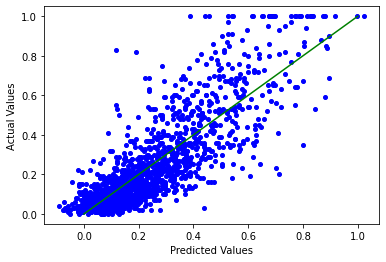

In [191]:
#The correlation among predicted and actual are plotted 
#Using the matplotlib
%matplotlib inline
pl.plot(p_tr, Y_tr,'bo', markersize=4)
pl.plot([0,1],[0,1], 'g-')
pl.xlabel('Predicted Values')
pl.ylabel('Actual Values')
pl.show()

In [192]:
#The regression weights are plotted
#Using the matplotlib
%matplotlib inline
def plot_co_efficients(model, n_features, feature_names):
    pl.barh(range(n_features), model.coef_, align='center')
    pl.yticks(np.arange(n_features), feature_names)
#The label for X and Y are give as 'Co-efficient Val' & 'Feature'
    pl.xlabel("Co-efficient Val")
    pl.ylabel("Feature")
    pl.ylim(-1, n_features)

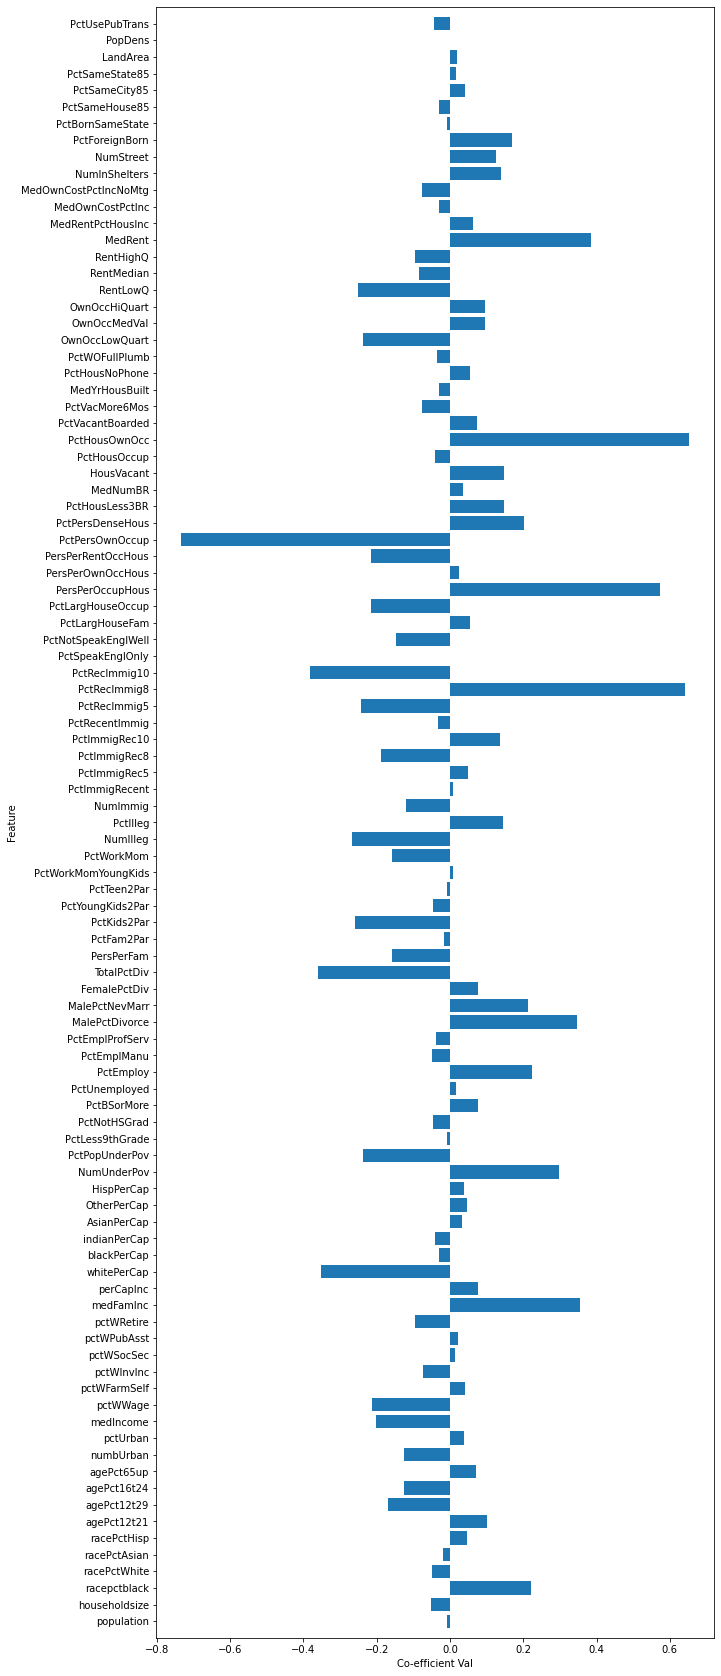

In [193]:
#The co-efficients are plotted 
#figure size being 10.30
plt.figure(figsize=(10,30))
plot_co_efficients(lin_reg, len(tr.columns), tr.columns)

In [194]:
#Cross Validation is done
#On 10 fold
#Importing the cross_val_score 
from sklearn.model_selection import cross_val_score
#The cross_val_score is computed
cval_score = cross_val_score(lin_reg, X_tr, Y_tr, scoring ="neg_mean_squared_error", cv=10)
#The abs value for cross_val_score is printed
print(np.sqrt(abs(cval_score)))
cval_rmse = np.mean(np.sqrt(abs(cval_score)))

[0.14 0.14 0.13 0.14 0.14 0.13 0.12 0.12 0.14 0.15]


In [195]:
#Using the method 'Simple Linear Regression'
method_SLR = 'Simple Linear Regression'
print('Method: %s' %method_SLR)
print('RMSE on training: %.4f' %rmse_tr)
print('RMSE on 10-fold CV: %.4f' %cval_rmse)

Method: Simple Linear Regression
RMSE on training: 0.1262
RMSE on 10-fold CV: 0.1343


The 10-Fold CV was not used, however the RMSE performed good without the use of it

c.[15 pts] Feature Selection:  use the scikit-learn to select the best subset of features to perform linear regression. For feature selection, write a script or function that takes as input the training data; target variable; the regression model; and any other parameters you find necessary. The function should return the optimal percentage of the most informative features to use. Your approach should use k-fold cross-validation on the training data (use k=5 for consistency) and use feature_selection.SelectPercentile to find the most informative variables for a range of percentile values [Note: since this is regression not classification, in the SelectPercentile function you should use feature_selection.f_regression as scoring function rather than chi2). You should also plot the model's error values on cross-validation using only the selected features across the range of percentile values. For variety, in this part we will use Mean Absolute Error (MAE) as the error metric instead of RMSE. For cross-validation, use scikit's cross_val_score function. In order to use cross_val_score with regression you'll need to pass to it a specific error function. In this case, you will use scoring='neg_mean_absolute_error' as a parameter. You should use aboslute values to convert these negated MAE values to positive MAE values. Your plot should look similar (but won't be exactly the same as this example). Once you have identified the best percentile based on cross-validation, use it to identify and display the corresponding best features. As a final step, train your model on the full 80% training data with the optimal subset of features and then compute it's peformance (again using MAE) on the set-aside 20% test partition.

[Note: For an example of a similar feature selection process please review the class example notebook (though note that the task in this example was classification not regression). Also, review scikit-learn documentation for feature selection.]

In [196]:
#We are importing using the sci-kit
#Also, importing the feature_selection, f_regression, SelectPercentile, and math
#F-statistic and p-value are being returned by the univariate linear regression
from sklearn import feature_selection
from sklearn.feature_selection import f_regression, SelectPercentile
import math

In [197]:
#We are importing using the sci-kit
#Also, importing the feature_selection, f_regression, SelectPercentile, and math
#F-statistic and p-value are being returned by the univariate linear regression
from sklearn import feature_selection
from sklearn.model_selection import cross_val_score
#Performing the fit transform for the feature selection
#Selecting the features with the highest scores (SelectPercentile)
percentiles = range(1, 100, 5)
results = []
for i in range(1, 100, 5):
    fs = feature_selection.SelectPercentile(feature_selection.f_regression, percentile=i)
    x_tr_fs = fs.fit_transform(X_tr, Y_tr)
    scores = cross_val_score(lin_reg, x_tr_fs, Y_tr, cv=5, scoring='neg_mean_absolute_error')
    scores = abs(scores)
    print("%2d  %0.4f" % (i, scores.mean()))
#Printing the results
    results = np.append(results, scores.mean())

 1  0.1129
 6  0.0994
11  0.0990
16  0.0991
21  0.0975
26  0.0961
31  0.0948
36  0.0947
41  0.0944
46  0.0947
51  0.0950
56  0.0953
61  0.0957
66  0.0957
71  0.0958
76  0.0952
81  0.0954
86  0.0951
91  0.0953
96  0.0953


In [198]:
optimal_percentile_ind = np.where(results == results.min())[0][0]
print(optimal_percentile_ind)

8


In [199]:
#importing the warnings to alter some condition in the program 
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 
#Using the Linear Regression
lin_reg = LinearRegression()
percentiles = range(1, 100, 5)
scorer ='neg_mean_absolute_error'
#Using the N = 5
N =5
#optimal_num_features is defined with parameters as model, X_tr, Y_tr, N, percentile, scorer
def optimal_num_features(model, X_tr, Y_tr, N, percentile, scorer):
    results = []  
    for i in percentiles:
        f_s = SelectPercentile(f_regression, percentile=i)
        X_tr_f_s = f_s.fit_transform(X_tr, Y_tr)
        scores = abs(cross_val_score(model, X_tr_f_s, Y_tr, cv=N, scoring = scorer))
        print (i, scores.mean())
        results = np.append(results, scores.mean())        
    optimal_percentile = np.where(results == results.min())[0]
    print ("Optimal percentile of features:{0}".format(percentiles[int(optimal_percentile)]))
    return optimal_percentile, results
optimal_percent, results = optimal_num_features(lin_reg,X_tr,Y_tr,N,percentiles,scorer)
optimal_num_features = int(math.floor(percentiles[int(optimal_percent)]*X_tr.shape[1])/100)
print ("\noptimal_percent : ",optimal_percent," Optimal number of features:{0}".format(optimal_num_features), "\n")

1 0.11287401163402822
6 0.09943268475677308
11 0.09900510519125444
16 0.0990905907952681
21 0.09750686221310859
26 0.09608904536542377
31 0.09478480270197638
36 0.09474955355002232
41 0.09435370428857698
46 0.09466441760571027
51 0.09498773346781053
56 0.0953208516480594
61 0.09574966889254498
66 0.09572089544915725
71 0.09583132229767206
76 0.09519157369784723
81 0.09542568827536395
86 0.09513624310358179
91 0.09525366581598067
96 0.0952762785288391
Optimal percentile of features:41

optimal_percent :  [8]  Optimal number of features:39 



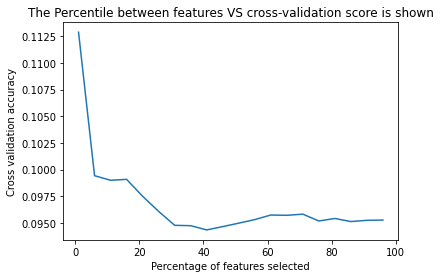

In [200]:
#Features vs cross-validation scores percentile are plotted
#Using the PyLab from the matplotlib
import pylab as pl
pl.figure()
#Mentioning the Title for X and Y label respectively
pl.title("The Percentile between features VS cross-validation score is shown")
pl.xlabel("Percentage of features selected")
pl.ylabel("Cross validation accuracy")
pl.plot(percentiles,results)

In [201]:
print("optimal_percent ",percentiles[int(optimal_percent)])
print()
f_s = SelectPercentile(f_regression,percentile=percentiles[int(optimal_percent)])
X_tr_fs = fs.fit_transform(X_tr,Y_tr)
for i in range(len(X_tr.columns.values)):
    if fs.get_support()[i]:
        print (X_tr.columns.values[i], '\t', fs.scores_[i])

optimal_percent  41

population 	 256.0323547372104
householdsize 	 3.492519416199977
racepctblack 	 1074.8895092675332
racePctWhite 	 1412.507812392418
racePctHisp 	 137.54043215678004
agePct12t21 	 4.894803532795906
agePct12t29 	 37.334014965114044
agePct16t24 	 15.875055643949556
agePct65up 	 8.24793840554524
numbUrban 	 247.77613854814723
pctUrban 	 11.060895847737793
medIncome 	 341.63253752319184
pctWWage 	 161.57075094157048
pctWFarmSelf 	 40.34422029878609
pctWInvInc 	 756.0149723312651
pctWSocSec 	 22.486379068173918
pctWPubAsst 	 784.5706408092445
pctWRetire 	 13.975623750024441
medFamInc 	 366.9004218440595
perCapInc 	 214.99315799068734
whitePerCap 	 65.44623454922727
blackPerCap 	 126.57709861890284
indianPerCap 	 12.317095444554932
AsianPerCap 	 29.06922706893266
OtherPerCap 	 33.36930259404439
HispPerCap 	 92.36570683066252
NumUnderPov 	 400.30785689079215
PctPopUnderPov 	 578.8173652137684
PctLess9thGrade 	 319.21810810192335
PctNotHSGrad 	 472.1962078690574
PctBSorMore

In [202]:
f_s = SelectPercentile(f_regression, optimal_percent)
X_tr_fs = fs.fit_transform(X_tr, Y_tr)
lin_reg = LinearRegression()
lin_reg.fit(X_tr_fs, Y_tr)
X_te_fs = fs.transform(X_te)
predict = lin_reg.predict(X_te_fs)
score = mean_squared_error(Y_te,predict )
print("MAE score for test data on cv: {}".format(abs(score).mean()))

TypeError: __init__() takes from 1 to 2 positional arguments but 3 were given

d. [10 pts] Next, using the original train and test data in part (a), perform Ridge Regression and Lasso Regression using the modules from sklearn.linear_model. In each case, perform systematic model selection to identify the optimal alpha hyperparameter (the regularization coefficient). You should create a function that takes as input the training data and target variable; the parameter to vary and a list of its values; the model to be trained; and any other relevant input needed to determine the optimal value for the specified parameter. The model selection process should perform k-fold cross validation (k should be a parameter, but you can select k=5 for this problem). For each model, you should also plot the error values (this time using RMSE as the error metric) on the training and cross-validation splits across the specified values of alpha. Finally, using the best alpha values for each regression model, train the model on the full training data and evaluate it on the set-aside test data. Discuss your observations and conclusions, especially about the impact of alpha on bias-variance trade-off. [Hint: for an example of a similar model optimization process please review the class example notebook.]


In [203]:
#Imporing the ridge regression using
#sci-kit package
from sklearn.linear_model import Ridge

In [204]:
#Tr - Train
#Te - Test
def calc_params(Data, y, model, param_values, param_name, K, verbose, model_name):
    #The i/p are converted into Numpy arrays
    Data = np.array(Data)
    y = np.array(y)
    #The training score and testing score are initialized with zeros
    tr_scores = np.zeros(len(param_values))
    te_scores = np.zeros(len(param_values))
    for i, param_value in enumerate(param_values):
        #The classifier parameters are set
        model.set_params(**{param_name:param_value})
        #The K scores for each Fold are intialized
        k_train_scores = np.zeros(K)
        k_test_scores = np.zeros(K)
        #Creating a K-Fold cross-validation technique
        #Computing the K-Fold cross-validation
        cv = KFold(n_splits=K, shuffle=True, random_state=0)
        for tr, te in cv.split(Data):
            # fit the classifier in the corresponding fold
            # and obtain the corresponding accuracy scores on train and test sets
            model.fit(Data[tr], y[tr])
            #Predicting for the training and testing scores
            tr_predict = model.predict(Data[tr])
            te_predict = model.predict(Data[te])            
            k_tr_scores = np.sqrt(mean_squared_error(y[tr], tr_predict))
            k_te_scores = np.sqrt(mean_squared_error(y[te], te_predict))
        #The mean of the K-Fold scores are being stored
        tr_scores[i] = np.mean(k_tr_scores)
        te_scores[i] = np.mean(k_te_scores)  
#The training and testing scores are plotted
    fig = plt.figure(figsize=(15,10))
#Plotting the Training and Testing
    plt.plot(param_values, tr_scores, label='Tr', alpha=0.4, lw=2, c='b')
    plt.plot(param_values, te_scores, label='Te', alpha=0.4, lw=2, c='g')
#Title
    plt.title(model_name)
    plt.legend(loc=7)
#X and Y label are given
    plt.xlabel(param_name + " values")
    plt.ylabel("Cross-validation RMSE")
    min_err_idx = np.where(te_scores == te_scores.min())
    min_err_alpha = param_values[min_err_idx]    
#The scores for training and testing on each of the parameter value
#are returned
    return tr_scores, te_scores, min_err_alpha,min_err_idx

 tr shape  (1595, 97)  y-tr shape  (1595,)


 The minimum RMSE for " Ridge " using cross validation is: 0.13882110895925448 with alpha : 1.0060150753768842


 The minimum RMSE for " Lasso " using cross validation is: 0.14224582056412474 with alpha : 0.001


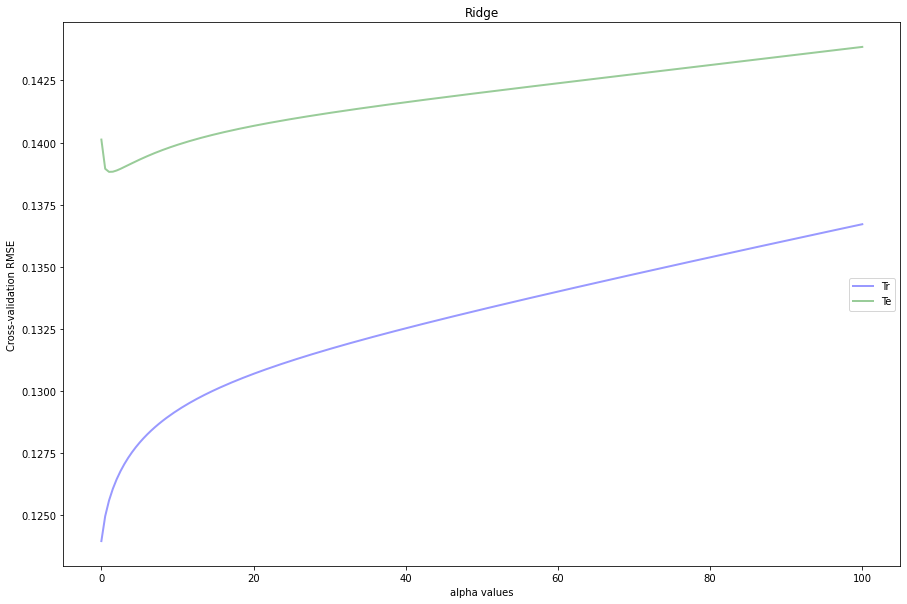

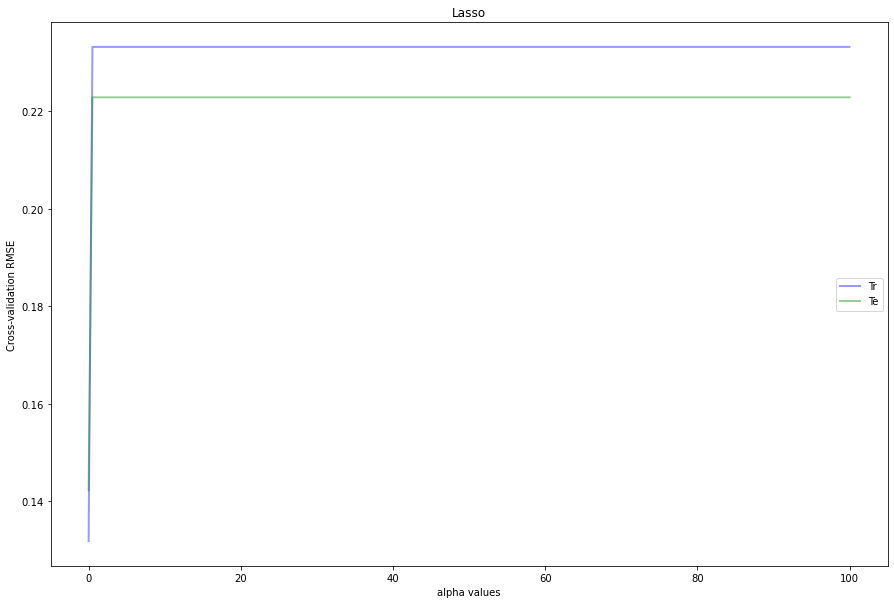

In [205]:
#Printing the shapes for Training and Testing
print(' tr shape ',X_tr.shape,' y-tr shape ',Y_tr.shape)
alpha = np.linspace(0.001, 100, 200)
alpha = np.array([float(e) for e in alpha])
#N = 5
number_of_fold = 5
param_name = 'alpha'
param_values = alpha
verbose = False
models = {'Ridge': Ridge(),'Lasso':Lasso()}
min_alpha = {}
for key in models.keys():  
    tr_scores, te_scores, min_err_alpha,min_err_idx = calc_params(X_tr, Y_tr, models.get(key), 
                                                                  param_values,
                                                                  param_name, 
                                                                  number_of_fold,verbose,key)   
    print ('\n\n The minimum RMSE for \"',key,'\" using cross validation is:', te_scores[min_err_idx][0],'with', param_name,':', min_err_alpha[0])
    min_alpha[key]=min_err_alpha[0]

In [206]:
#Models are done in Test
print("The models are running on Test")
model = None
#Ridge & Lasso Regression
for key in min_alpha.keys():
    if(key=='Ridge'):
        model = Ridge(fit_intercept=True, alpha=min_alpha.get(key))
        model.fit(X_tr, Y_tr)          
    else :
        model = Lasso(fit_intercept=True, alpha=min_alpha.get(key))
        model.fit(X_tr, Y_tr)          
    pred = model.predict(X_te)
    RMSE = np.sqrt(mean_squared_error(Y_te, pred))
#Printing the Root Mean Sq Error on Testing data
    print(key,' => Root Mean Squared error on test data: %0.8f' % RMSE, 'using alpha =',min_alpha.get(key))

The models are running on Test
Ridge  => Root Mean Squared error on test data: 0.14337675 using alpha = 1.0060150753768842
Lasso  => Root Mean Squared error on test data: 0.14601641 using alpha = 0.001


e. [10 pts] Next, perform regression using Stochastic Gradient Descent Regressor from scikit-learn (again use the original train-test split in part (a). Note that SGDRegessor requires that features be standardized (with 0 mean and scaled by standard deviation). Prior to fiting the model, perform the scaling using StandardScaler from sklearn.preprocessing. For this problem, perform a grid search (using GridSearchCV from sklearn.grid_search). Your grid search should compare combinations of two penalty parameters ('l2', 'l1') and different values of alpha (alpha could vary from 0.0001 which is the default to relatively large values, say 10). Using the best parameters, train the model on the full training partition and apply the model to the set-aside test data, comparing traning and test RMSE scores. Finally, perform model optimization (similar to part d, above) to find the best "l1_ratio" parameter using SGDRegressor with  the "elasticnet" penalty parameter. [Note: "l1_ratio" is The Elastic Net mixing parameter, with 0 <= l1_ratio <= 1;  l1_ratio=0 corresponds to L2 penalty, l1_ratio=1 to L1 penalty; defaults to 0.15.] Using the best mixing ratio, apply the Elastic Net model, trained on full training data, to the set-aside test data and compare to the training perfromance. Provide a brief summary of your findings from the above experiments.

In [207]:
#Using the sci-kit package
#we are importing 
#SGDRegressor, StandardScaler, and GridSearchCV
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [208]:
print('input data Shape',comm.shape)
#Dropping state, communityname, and ViolentCrimesPerPop
vs_matrix = np.array(comm.drop(['state','communityname','ViolentCrimesPerPop'],axis=1,inplace=False))
#Data Standardizing is done 
scaler = StandardScaler()
scaler.fit(vs_matrix)
vs_matrix = scaler.transform(vs_matrix)
vs_tr, vs_te, vs_tar_tr, vs_tar_te = train_test_split(vs_matrix, comm.ViolentCrimesPerPop, test_size=0.2, random_state=33)
print("vs train shape ",vs_tr.shape, " test shape ",vs_te.shape)
print("train target shape ",vs_tar_tr.shape," Test target shape ",vs_tar_te.shape)
#Training and Testing for X and Y
x_tr = np.array(vs_tr)
y_tr = np.array(vs_tar_tr)
x_te = np.array(vs_te)
y_te = np.array(vs_tar_te)

input data Shape (1994, 100)
vs train shape  (1595, 97)  test shape  (399, 97)
train target shape  (1595,)  Test target shape  (399,)


In [209]:
#Stochastic Gradient Descent (SGD) is used 
sgd_reg = SGDRegressor();
alpha = np.linspace(.0001,10,100)
alpha = np.array([float(e) for e in alpha])
parameters = {
    'penalty':["l2","l1"],
    'alpha':alpha
}
g_s = GridSearchCV(sgd_reg, parameters, verbose=1, cv=5)

In [210]:
%time _ = g_s.fit(X_tr, Y_tr)
g_s.best_params_, g_s.best_score_

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
CPU times: total: 1min 1s
Wall time: 6.17 s


({'alpha': 0.0001, 'penalty': 'l2'}, 0.6424461972572585)

In [211]:
#The best parameters are used and applied on the model 
sgd = SGDRegressor()
val = ""
for (i, j) in g_s.best_params_.items():
    sgd.set_params(**{i:j})
    print ("The optimum value of", i, "is estimated as", j)
    val += str(i) + "=" + str(j) + " "
    print("\n")
#Fitting the SGB into X and Y
sgd.fit(X_tr, Y_tr)
pred = sgd.predict(X_te)
RMSE = np.sqrt(mean_absolute_error(Y_te, pred))
print ('The test dataset RMSE: %0.8f' % RMSE, "with",val)

The optimum value of alpha is estimated as 0.0001


The optimum value of penalty is estimated as l2


The test dataset RMSE: 0.32369588 with alpha=0.0001 penalty=l2 


SGD Regressor minimum RMSE using the cross-validation is: 0.1435839758999752 with l1_ratio : 0.47479999999999994


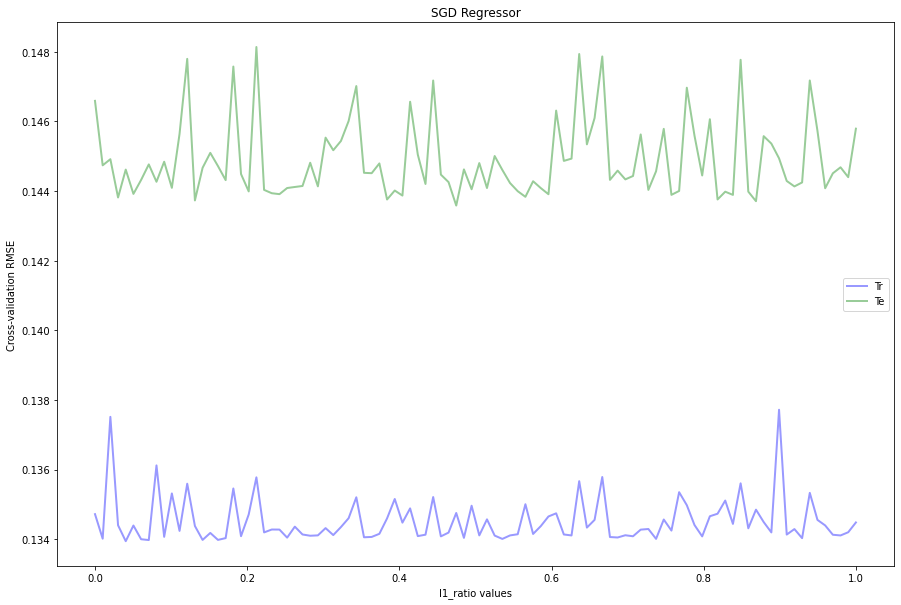

In [212]:
l1_rat_range = np.linspace(0.0001,1, 100)
#Parameter name and value
param_name = "l1_ratio" 
param_value = l1_rat_range
verbose=False
#Loss function is done
#Penalized linear regression model
model = SGDRegressor(penalty='elasticnet')
tr_scores, te_scores, min_err_alpha,min_err_idx = calc_params(X_tr, Y_tr,model, 
                                                                   param_value, param_name, 5, 
                                                                   verbose, "SGD Regressor")    
print ('SGD Regressor minimum RMSE using the cross-validation is:', 
       te_scores[min_err_idx][0],'with',
       param_name,':', 
       min_err_alpha[0])

The l1_ratio values on the RMSE training data is 0.137 (from Output) which is the lowest and that can be used to run the model on the test data as the penalty parameter using the "elasticnet".

In [213]:
#The best parameters are being used and 
#then we apply it in the model 
sgd = SGDRegressor(penalty='elasticnet', l1_ratio=min_err_alpha[0])
#Fitting the SGD
sgd.fit(X_tr, Y_tr)
pred = sgd.predict(X_te)
#Mean Absolute Error
MAE = np.sqrt(mean_absolute_error(Y_te, pred))
print ('MAE on test data set: %0.8f' % MAE, "'elasticnet' and l1_ratio penalty equals to = ",min_err_alpha[0])

MAE on test data set: 0.32247476 'elasticnet' and l1_ratio penalty equals to =  0.47479999999999994


# Question 2 
# Automatic Document Clustering

a. [5 pts] Create your own distance function that, instead of using Euclidean distance, uses Cosine similarity. This is the distance function you will use to pass to the kMeans function in the included module. Note: you should not use external function for computing Cosine. Write your own version that computes Cosine similarity between two n-dimentional vectors and returns the inverse as the distance between these vectors.


In [214]:
#Importing the packages
#Running the packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [215]:
#Calculating the Euclidean Distance
def calculateEuclideanDistance(x,D):
    dist_ = np.sqrt((D -x)**2).sum(axis=1)
    return dist
#Calculating the Cosine Similarity Distance
def calculateCosineSimilarityDistance(x,D):  
    D_norm = np.linalg.norm(D) 
    x_norm = np.linalg.norm(x)
    sims = np.dot(D,x)/(D_norm * x_norm)
#The inverse of Cosine similarity is the distance measure
    dist_ = 1 - sims  
    return dist_

b. [10 pts] Load the data set [Note: the data matrix provided has terms as rows and documents as columns. Since you will be clustering documents, you'll need to take the transpose of this matrix so that your main data matrix is a document x term matrix. In Numpy, you may use the ".T" operation to obtain the transpose.] Then, use the train_test_split function (with random_state = 99) to perform a randomized split the data set (the document by term matrix) and set aside 20% for later use (see below). Use the 80% segment for clustering in the next part. Next, as in the previous assignment, perform TFxIDF transformation on these data sets. [Note: if you have difficulty with TFxIDF conversion, then use the original non-transformed data for the remainder of this assignment].

In [216]:
#Reading the matrix text file and running it 
#Reading the terms text file and running it 
#Reading the classes text file and running it 
matrix = pd.read_table("C:/Users/admin/Desktop/1/matrix.txt",delimiter=',',header=None)
terms = pd.read_table("C:/Users/admin/Desktop/1/terms.txt",delimiter=',',header=None)
classes = np.genfromtxt("C:/Users/admin/Desktop/1/classes.txt",delimiter=' ', dtype=int, skip_header=1, usecols=(1))

In [217]:
#Displaying matrix dataset
matrix

,0,1,2,3,4,5,6,7,8,9,...,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9323,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9324,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9325,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9326,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [218]:
terms

,0
0,aa
1,aargh
2,aaron
3,aaronc
4,ab
...,...
9323,zubov
9324,zv
9325,zw
9326,zx


In [219]:
#Displaying the classes
classes

array([0, 1, 1, ..., 3, 4, 2])

In [220]:
#Representing the shapes for the Matrix, 
#Terms, 
#Classes
print("Matrix Shape: " + str(matrix.shape))
print("Terms Shape: " + str(terms.shape))
print("Classes Shape: " + str(classes.shape))

Matrix Shape: (9328, 2500)
Terms Shape: (9328, 1)
Classes Shape: (2500,)


In [221]:
#The transpose of the matrix text file
matrixT = matrix.T
matrixT.shape

(2500, 9328)

In [222]:
DT_matrix = np.mat(matrixT)
DT_matrix.shape

(2500, 9328)

In [223]:
#Importing the train_test_split using the sci-kit package
from sklearn.model_selection import train_test_split
x_tr, x_te, y_tr, y_te = train_test_split(matrixT, classes, test_size=0.2, random_state=99)
#Prining the Training and Testing
print("train : ",x_tr.shape)
print("Test : ",x_te.shape)

train :  (2000, 9328)
Test :  (500, 9328)


c. [20 pts] Perform Kmeans clustering on the transformed training data from part (b) Perform a qualitative analysis of the clusters by examining top features in each cluster and identifying patterns in the data. To facilitate your analysis of the clusters, write a function to display the top N terms in each cluster sorted by decreasing centroid weights for each term in the cluster (mean TFxIDF frequency of the term). Your output should also display the cluster DF value for the top N terms. The cluster DF value for a term t in a cluster C is the percentage of docs in cluster C in which term t appears (so, if a cluster has 500 documents, and term "game" appears in 100 of those 500 documents, then DF value of "game" in that cluster is 0.2 or 20%). For each cluster, you should also display the cluster size (the nunber of documents in the cluster). Here is an example of how this output might look like (here the top 10 terms for a sample of clusters are displayed in decreasing order of mean TFxIDF weights from the cluster centroids (the "Freq" column), but in addition the cluster DF values (both raw and as a percentage) are also shown).
Important Note: for this problem you should try several values of k for the number of clusters (try values of k from 4 through 8) and in each case try several runs in order to obtain clusters that seem more meaningful. In some cases, you may find some small clusters containing noise documents, which is not unusual. The point is to experiment with different runs and cluster numbers until you find at least several clusters that seem to capture some of the key topics in the documents. You do not need to provide the results of all your runs; you should only provide the results of your best clustering along with a brief discussion of your experimentation and your final observations.
[Extra Credit - 5 pts: use your favorite third party tool or library, ideally with a Python based API, to create a word cloud for each cluster (using your best clustering from earlier experiments.]

In [224]:
#Getting the random centroids
def randCent(dataSet, k):
    n = np.shape(dataSet)[1]
    centroids = np.zeros((k,n), dtype=float)
    for j in range(n): 
        minJ = min(dataSet[:,j])
        rangeJ = float(max(dataSet[:,j]) - minJ)
        centroids[:,j] = minJ + rangeJ * np.random.rand(k)
    return centroids

In [225]:
def kmeans(D,k,distMeas=calculateCosineSimilarityDistance,createCentroid = randCent):
    m = np.shape(D)[0]
    cluster_Assment = np.mat(np.zeros((m,2))) 
#Prinitng the calculated centroids (Start)
    print('calculating centroids : Start')
    centroids = createCentroid(D,k)
#Prinitng the calculated centroids (End)
    print('calculating centroids : End','\n centroids are :: \n',centroids)
    clusterChanged = True
    while clusterChanged:
        clusterChanged = False
#Looping over the datapoints and the closest centroid are assigned to them
        for i in range(m):
            min_DIst = np.inf;
            min_Index = -1;
            for j in range(k):
                dist_JI = distMeas(centroids[j,:],D[i,:])
                if(dist_JI < min_DIst):
                    min_DIst = dist_JI;
                    min_Index = j;
            if cluster_Assment[i,0] !=min_Index : cluster_Changed = True
            cluster_Assment[i,:] = min_Index, min_DIst**2      
#The centroid is updated 
        for cent in range(k):
            pts_In_Clust = D[np.nonzero(cluster_Assment[:,0] == cent)[0]]
            centroids[cent,:] = np.mean(pts_In_Clust,axis=0)
    return centroids, cluster_Assment

In [226]:
%%time
data = np.mat(x_tr)
#Using the Kmeans for clustering
centroids, cluster_Assment = kmeans(data,5)
#Running the centroids

calculating centroids : Start
calculating centroids : End 
 centroids are :: 
 [[ 0.63  0.4  43.32 ...  1.12  0.77  1.65]
 [ 0.39  0.86 41.45 ...  0.68  0.24  0.07]
 [ 0.71  0.73 30.62 ...  1.19  0.95  4.91]
 [ 0.03  0.95 20.1  ...  0.66  0.06  2.53]
 [ 0.19  0.71 21.09 ...  1.29  0.34  0.08]]


C:\Users\admin\AppData\Local\Temp\ipykernel_60652\2915286355.py:22: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  cluster_Assment[i,:] = min_Index, min_DIst**2


CPU times: total: 2min 2s
Wall time: 2min


In [227]:
#printing the centroids shape
print(" centroids shape",centroids.shape)
#printing the clusster Assesment shape
print(" clusterAssment shape ",cluster_Assment.shape)

 centroids shape (5, 9328)
 clusterAssment shape  (2000, 2)


In [228]:
def cluster_report(data,terms, clusters, centroids):
#Clusters_DF
    clusters_DF = pd.DataFrame(clusters)
#term_list
    term_list = pd.Series(terms[0], name='Term')   
    cluster_labels = np.unique(clusters_DF[0])
    result = {}
    size ={}
    for c in cluster_labels:
        c = int(c)
        print(c)
#The train data from Cluster 'C' index is taken
        cl_data = x_tr.index[clusters_DF[0]==c]
        centroid = pd.Series(centroids[c], name='Freq')
        cl_size = len(cl_data)
        size[c] = cl_size        
#doc Cluster
        docsfrom_cluster = x_tr[x_tr.index.isin(cl_data)]
#term Cluster
        docsfrom_cluster = docsfrom_cluster.T
#All the non-zero terms are counted 
        DF = (pd.DataFrame([(docsfrom_cluster!=0).sum(1)]).T)
        DF = DF / size[c]
#In the cluster the number of docs are divided by each term count 
        DF.columns=['DF']     
        DF_PERCENT_ = DF.copy()
        DF_PERCENT_ = DF_PERCENT_ * 100
        DF_PERCENT_.columns=['% of Docs']
#Concatenating the centroid, terms, and DF values
        term_centroid_ = pd.concat([term_list, centroid,DF,DF_PERCENT_],axis=1)
        result[c] = term_centroid_
    return result , size

In [229]:
def display_clusters(cluster_Dict, cluster_Size, num_Terms):
    for c in cluster_Dict.keys():
        cluster_rep_ = cluster_Dict[c]
#Printing the Cluster Size 
        print("Cluster ", c, "size =", cluster_Size[c])
        print(cluster_rep_.sort_values(by="DF", ascending=False).head(num_Terms))
    return

In [230]:
x_tr = pd.DataFrame(x_tr)
cluster_Dict_nonidf , cluster_Size_nonidf = cluster_report(x_tr,terms,cluster_Assment,centroids)
print(cluster_Dict_nonidf.keys())
print("cluster of docs")
for key in cluster_Size_nonidf.keys():
      print(key," \t :: ",cluster_Size_nonidf[key])

1
3
4
dict_keys([1, 3, 4])
cluster of docs
1  	 ::  1
3  	 ::  5
4  	 ::  1994


In [231]:
#NUMOFTOPTERMS is given 10
numOf_TopNTerms = 10
#Displaying the clusters
display_clusters(cluster_Dict_nonidf,cluster_Size_nonidf,numOf_TopNTerms)

Cluster  1 size = 1
          Term  Freq   DF  % of Docs
204       alin   1.0  1.0      100.0
7115      sale   1.0  1.0      100.0
1391     class   1.0  1.0      100.0
547         ax   2.0  1.0      100.0
8209     thoma   1.0  1.0      100.0
4027  instruct   1.0  1.0      100.0
7466    silent   1.0  1.0      100.0
7895   subject   1.0  1.0      100.0
6293     power   1.0  1.0      100.0
5593     ninja   1.0  1.0      100.0
Cluster  3 size = 5
       Term  Freq   DF  % of Docs
443    asqq   5.0  1.0      100.0
2508     ei   8.2  1.0      100.0
3317   gkwt   3.2  1.0      100.0
744     bhj   4.6  1.0      100.0
1420  cliff   1.0  1.0      100.0
5680   nriz   4.0  1.0      100.0
5428    mwt   3.8  1.0      100.0
3385     gp   4.6  1.0      100.0
4835     ma   7.0  1.0      100.0
5426     mw  10.2  1.0      100.0
Cluster  4 size = 1994
         Term  Freq    DF  % of Docs
7895  subject  1.08  1.00     100.00
9129    write  0.64  0.48      48.09
5795       on  0.76  0.39      39.27
417    a

In [232]:
#DT_IDF is repeated
term_Freqs = matrix.sum(axis=1).astype(np.int64)
term_Freqs.shape

(9328,)

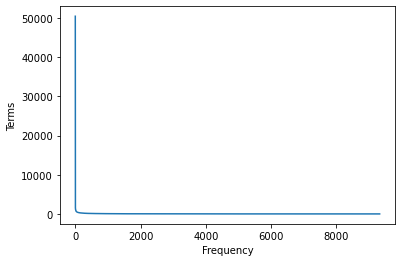

In [233]:
#Plotting the term_Freqs
plt.plot(sorted(term_Freqs, reverse=True))
#Providing the X and Y labels
plt.xlabel('Frequency')
plt.ylabel('Terms')
plt.show()

The above output (graph) curve, it shows us that the term frequency are lesser.

In [234]:
#Printing the shape for TD and DT
print("TD ", matrix.shape)
DTmatrix = matrix.T
print("DT ",DTmatrix.shape)

TD  (9328, 2500)
DT  (2500, 9328)


In [235]:
num_Terms=DT_matrix.shape[1]
N_Docs = DT_matrix.shape[0]
T_D_matrix = matrix
print("numTerms ",num_Terms," NDocs ",N_Docs)
#For each term finding the doc counts
D_F = pd.DataFrame([(T_D_matrix!=0).sum(1)]).T
print(D_F.shape)
#A matrix with all entries are created 
N_Matrix=np.ones(np.shape(T_D_matrix), dtype=float)*N_Docs
np.set_printoptions(precision=2,suppress=True,linewidth=120)
#Printing the NMatrix
print(N_Matrix)
#Each entry is converted into IDF values
#IDF - Inverse Data Frequency
IDF = np.log2(np.divide(N_Matrix, np.array(D_F)))
np.set_printoptions(precision=2,suppress=True)
print(IDF)
pd.set_option("display.precision", 2)
#The TFXIDF is computed
TD_tf_idf = T_D_matrix * IDF
print("TD_tfidf",TD_tf_idf)
DT_tf_idf = TD_tf_idf.T
DT_tf_idf = np.mat(DT_tf_idf)
print("The DT_tfidf.shape :",DT_tf_idf.shape)

numTerms  9328  NDocs  2500
(9328, 1)
[[2500. 2500. 2500. ... 2500. 2500. 2500.]
 [2500. 2500. 2500. ... 2500. 2500. 2500.]
 [2500. 2500. 2500. ... 2500. 2500. 2500.]
 ...
 [2500. 2500. 2500. ... 2500. 2500. 2500.]
 [2500. 2500. 2500. ... 2500. 2500. 2500.]
 [2500. 2500. 2500. ... 2500. 2500. 2500.]]
[[7.97 7.97 7.97 ... 7.97 7.97 7.97]
 [8.7  8.7  8.7  ... 8.7  8.7  8.7 ]
 [6.83 6.83 6.83 ... 6.83 6.83 6.83]
 ...
 [9.7  9.7  9.7  ... 9.7  9.7  9.7 ]
 [9.7  9.7  9.7  ... 9.7  9.7  9.7 ]
 [9.29 9.29 9.29 ... 9.29 9.29 9.29]]
TD_tfidf       0     1     2     3     4     5     6     7     8     9     ...  2490  \
0      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
1      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
2      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
3      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
4      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

In [236]:
x_tr_df, x_te_idf, y_tr_idf, y_te_idf = train_test_split(DT_tf_idf, classes, test_size=0.2, random_state=99)

In [237]:
data = np.mat(x_tr_df)
#Using the K-means
centroids, cluster_Assment = kmeans(data,5)
print(" clusterAssment : ",cluster_Assment.shape)
print(" centroids : ",centroids.shape)

calculating centroids : Start
calculating centroids : End 
 centroids are :: 
 [[  4.88   5.1  136.07 ...  10.84   1.32  16.09]
 [  6.9    0.13 190.3  ...  11.48   8.96   7.75]
 [  7.06   2.22 186.16 ...   6.41   9.42  41.25]
 [  3.59   1.67 146.23 ...   4.1    7.25   1.45]
 [  5.35   1.71  49.69 ...   4.57   3.95  32.94]]


C:\Users\admin\AppData\Local\Temp\ipykernel_60652\2915286355.py:22: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  cluster_Assment[i,:] = min_Index, min_DIst**2


 clusterAssment :  (2000, 2)
 centroids :  (5, 9328)


In [238]:
#Finding the Centroids
centroids

array([[0.  , 0.  , 0.16, ..., 0.12, 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.03, 0.03, 0.27, ..., 0.01, 0.01, 0.05],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ]])

In [239]:
x_tr_df = pd.DataFrame(x_tr_df)
cluster_Dict , cluster_Size = cluster_report(x_tr_df,terms,cluster_Assment,centroids)
print(cluster_Dict.keys())
print("\ncluster# :: # of docs")
for key in cluster_Size.keys():
      print(key," \t :: ",cluster_Size[key])

0
1
2
3
4
dict_keys([0, 1, 2, 3, 4])

cluster# :: # of docs
0  	 ::  83
1  	 ::  4
2  	 ::  1907
3  	 ::  5
4  	 ::  1


In [240]:
#NumofTopNTerms
num_OfTop_NTerms = 10
display_clusters(cluster_Dict,cluster_Size,num_OfTop_NTerms)

Cluster  0 size = 83
         Term  Freq    DF  % of Docs
7895  subject  0.00  1.00     100.00
5795       on  0.75  0.36      36.14
2933     file  2.81  0.30      30.12
8174    thank  0.73  0.28      27.71
9129    write  0.36  0.27      26.51
5506     need  0.86  0.25      25.30
4449     know  0.58  0.25      25.30
2550    email  0.59  0.20      20.48
417    articl  0.40  0.19      19.28
4319     just  0.45  0.18      18.07
Cluster  1 size = 4
              Term      Freq    DF  % of Docs
7895       subject      0.00  1.00      100.0
6225           pne     13.45  0.75       75.0
5344            mp     37.56  0.75       75.0
3311         gizwt     16.96  0.75       75.0
5694           nui     42.40  0.75       75.0
7116  salmonusdedu      5.87  0.75       75.0
9223            yd     37.84  0.75       75.0
3275         ghjkn     10.88  0.75       75.0
547             ax  45576.57  0.75       75.0
5428           mwt     23.32  0.75       75.0
Cluster  2 size = 1907
         Term  Freq    

d. [5 pts] Using the cluster assignments from your Kmeans clustering and the original cluster labels for the training document, compare your clusters to the re-assigned classes by computing the Completeness and Homogeneity values. You should do this for the best values of k and the best clustering run you settled on in the previous part.
[Extra Credit - 5 pts: Try several other clustering runs each time with values of k ranging between 4 and 8 and in each case compute Completeness and Homogeneity. This experiment will indicate which clustering provides the best representation of the original newsgroup categories. Provide a brief report of your experiment including a comparison of final results for at least three different runs.]

In [241]:
#Training IDF
y_tr_idf

array([1, 0, 0, ..., 3, 1, 0])

In [242]:
#Cluster
cluster_Assment.T[0]

matrix([[0., 2., 2., ..., 2., 2., 2.]])

In [243]:
#importing the completeness_score, and homogeneity_score 
#using the sci-kit
from sklearn.metrics import completeness_score, homogeneity_score
#Completeness Score
#Homogeneity Score
print("completeness_score = ",completeness_score(y_tr_idf,np.ravel(cluster_Assment.T[0])))
print("homogeneity_score = ",homogeneity_score(y_tr_idf,np.ravel(cluster_Assment.T[0])))

completeness_score =  0.0639102193757946
homogeneity_score =  0.008286302814358196


e. [10 pts] Finally, using your cluster assignments as class labels, categorize each of the documents in the 20% set-aside data into each of the appropriate clusters (using your final clustering results in part c). Your categorization should be based on Cosine similarity between each test document and cluster centroids. For each test document show the assigned cluster label as well as Cosine similarity to the corresponding cluster.

In [244]:
#Printing the shape
print(centroids.shape)
print(centroids)
print("vs_test_idf shape ",x_te_idf.shape)

(5, 9328)
[[0.   0.   0.16 ... 0.12 0.   0.  ]
 [0.   0.   0.   ... 0.   0.   0.  ]
 [0.03 0.03 0.27 ... 0.01 0.01 0.05]
 [0.   0.   0.   ... 0.   0.   0.  ]
 [0.   0.   0.   ... 0.   0.   0.  ]]
vs_test_idf shape  (500, 9328)


In [245]:
results = []
x_te = np.array(x_te_idf)
for doc in x_te:
#dic
    dic = {}
#sim
    sim = []
    cluster = 0
    for centroid in centroids:
        val = np.ravel(calculateCosineSimilarityDistance(doc,centroid))[0]
        centroid_doc_sim = 1 - val 
        sim.append(centroid_doc_sim) 
        dic['Cluster to Cosine Similarity'+str(cluster)] = str(np.ravel(centroid_doc_sim)[0])
        cluster += 1     
    dic['The Predicted Cluster'] = sim.index(max(sim))    
    results.append(dic)
te_cluster = pd.DataFrame(results)

In [246]:
pd.options.display.max_rows = 50
print("The Categorized test data shape ",te_cluster.shape)
#Showing the result for the test cluster
te_cluster

The Categorized test data shape  (500, 6)


,Cluster to Cosine Similarity0,Cluster to Cosine Similarity1,Cluster to Cosine Similarity2,Cluster to Cosine Similarity3,Cluster to Cosine Similarity4,The Predicted Cluster
0,0.0005947145629348061,4.5542392901332107e-07,0.1771508063405529,0.016402888409637773,0.0032941266950289316,2
1,0.0005273903719441586,0.0,0.10402558965399467,0.02389476342484731,0.008207128739202263,2
2,0.0007477381836455965,1.4921338694962039e-05,0.13166280779932582,0.004224232708908149,0.009056930283236397,2
3,9.952061229578923e-05,4.997920329485872e-06,0.06067654386888233,0.03448694007478459,0.0,2
4,0.0007369601887645683,8.272710750212298e-06,0.1996192626254707,0.04104974102899528,0.008651124738891514,2
...,...,...,...,...,...,...
495,0.0008516999515513213,0.0,0.10975912590377535,0.0018424236411392902,0.0023510086123419427,2
496,0.00018328967802572205,3.7881102961101476e-06,0.10361856463833696,0.011662603881717581,0.0,2
497,0.0003130777146843622,4.2383552284142034e-05,0.07563875122836594,0.004731567287736382,0.0,2
498,0.0007647884015551387,6.199013367069739e-07,0.10731921378029818,0.01168417251769538,0.0025590047919475944,2
